In [1]:
%cd 'filepath'
from helper_functions import *

# The Travelling Salesperson Problem
This notebook will guide you through a practical example of a problem in combinatiorial optization which is central to the research field and industry.


## The roadtrip 
You are having your friends over for dinner and the topic of summer comes up. You all notice that there are two and a half weeks during summer where all of you have vacation at the same time! How about a road trip across Norway? Everyone thinks it’s a great idea and all kinds of suggestions are blurted out!

"I’d love to visit Geilo and Bergen!"

"I’ve never been to Hitra or Røros, could we go there?"

"All I want is to swim in the fjords at Odda."

"How about Loen or Venjesdalen? It’s close to Hitra right?"

"Can you pass the salt please?"

And on it goes, until you have all settled on which places to visit for your summer excursion. In all excitement you fetch a map to pin down all the locations to get an overview.

## Load data
A map containing all municipalitites is available at [kartkatalog.geonorge.no](https://kartkatalog.geonorge.no). Load the data using the `load_data()` function. There you'll find information on the location and name of each municipality.

In [2]:
municipalities = load_data()

## Your destinations
Below you see two lists. `destinations` contain the specific destinations you and your friends want to visit, and `municipalities_destinations` contain the municipality of each destination.

Thereafter you recieve the `positions` each municipality so you can pin point them onto the map.

The function `view_destinations(...)` takes in all the information defined above and displays where your destinations are on the map, in terms of their municipalities.

`destination_positions` collects the destination names and the destination positions conviniently into a so-called dictionary variable.

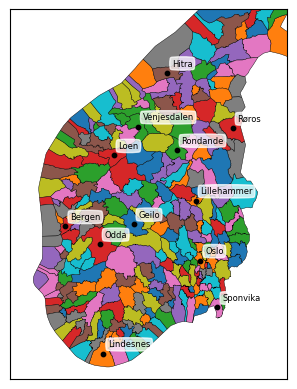

In [3]:
locations                = ['Bergen', 'Lillehammer', 'Odda'      , 'Røros',  'Geilo' , 'Oslo', 'Lindesnes', 'Venjesdalen', 'Loen'    , 'Hitra', 'Sponvika'   , 'Rondande']
municipalities_destinations = ['Bergen', 'Lillehammer', 'Ullensvang', 'Rosse',  'Hol'   , 'Oslo', 'Lindesnes', 'Rauma'      , 'Stryn'   , 'Hitra', 'Halden'     , 'Dovre']

positions = get_positions(municipalities, municipalities_destinations)
locations_positions = dict((zip(locations, positions)))

view_locations(municipalities, locations, positions)

## What is the shortest path?
Naturally, the question arises:
"I mean we have two and a half weeks sure, but I’d rather have us drive as little as possible, so we can spend as much time as possible at all our stops."

"Yes, we need to plan the optimal road trip route!"

Indeed, how would one go about selecting the best route for visiting all destinations while covering a minimal total traveling distance? This is in essence the ***traveling salesperson problem (TSP)*** whose name comes from a salesperson traveling from door to door to sell their product or service.

## Problem description
The traveling salesperson problem is synonomous to the traveling salesman problem is also known as the vehicle routing problem. It tells the story of a salesperson and a set of cities. The salesperson must visit **all cities exactly once**, starting from a certain one (e.g. the hometown) and return back to that hometown (a route which passes every location once and ends where it started is called a [Hamiltonian cycle](https://mathworld.wolfram.com/HamiltonianCycle.html).) The challenge of the problem is that the traveling salesperson wants to **minimize the total travelled distance** of the trip. So, what does the best route look like? 

### How hard can it be?
This problem has gained much attention and allure because while it is easy to describe, it is very difficult to solve for an increasing number of locations. In fact, it belongs to a class of optimization problems that are “NP-complete”, which means it is NP-hard. If a problem is NP-hard it essentially means that there is no guaranteed “quick” optimal solution, and the problem becomes rapidly more difficult to solve for an increasing problem size. The problem size for the TSP means the number of cities to visit.

For more information on NP-Hardness, see
1. Stackoverflow thread: [What are the differences between NP, NP-Complete and NP-Hard?](https://stackoverflow.com/questions/1857244/what-are-the-differences-between-np-np-complete-and-np-hard)
2. Blogpost: [The Status of the P Versus NP Problem
](https://cacm.acm.org/magazines/2009/9/38904-the-status-of-the-p-versus-np-problem/fulltext).

So why does the problem become so much harder when the problem size increases? It has to do with the expanding solution space, i.e. the increasing number of possible solutions. A route can be described as a sequence of cities A, B, C. The number of ways you can arrange this sequence increases incredibly fast. For example, if we have three cities A, B, C we can arrange them in $3! = 3*2*1 = 6$ ways. 

<style type="text/css">
.center {
  margin-left: auto;
  margin-right: auto;
}
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-style:solid;border-width:0px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;
  padding:10px 5px;word-break:normal;}
.tg th{border-style:solid;border-width:0px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-yj5y{background-color:#efefef;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-34fe{background-color:#c0c0c0;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="center">
<thead>
  <tr>
    <th class="tg-34fe">#</th>
    <th class="tg-34fe" colspan="3">Citites</th>
    <th class="tg-34fe">End</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-34fe">1</td>
    <td class="tg-c3ow">A</td>
    <td class="tg-c3ow">B</td>
    <td class="tg-c3ow">C</td>
    <td class="tg-yj5y">A</td>
  </tr>
  <tr>
    <td class="tg-34fe">2</td>
    <td class="tg-c3ow">A</td>
    <td class="tg-c3ow">C</td>
    <td class="tg-c3ow">B</td>
    <td class="tg-yj5y">A</td>
  </tr>
  <tr>
    <td class="tg-34fe">3</td>
    <td class="tg-c3ow">B</td>
    <td class="tg-c3ow">A</td>
    <td class="tg-c3ow">C</td>
    <td class="tg-yj5y">B</td>
  </tr>
  <tr>
    <td class="tg-34fe">4</td>
    <td class="tg-c3ow">B</td>
    <td class="tg-c3ow">C</td>
    <td class="tg-c3ow">A</td>
    <td class="tg-yj5y">B</td>
  </tr>
  <tr>
    <td class="tg-34fe">5</td>
    <td class="tg-c3ow">C</td>
    <td class="tg-c3ow">A</td>
    <td class="tg-c3ow">B</td>
    <td class="tg-yj5y">C</td>
  </tr>
  <tr>
    <td class="tg-34fe">6</td>
    <td class="tg-c3ow">C</td>
    <td class="tg-c3ow">B</td>
    <td class="tg-c3ow">A</td>
    <td class="tg-yj5y">C</td>
  </tr>
</tbody>
</table>

But say we have 7 items, then the number of unique arrangements grows to $5040$ ways. 12 items? Then we have $479 001 600$ ways! The size of the numbers in combinatorics can become very, very large. In the context of the TSP, we can argue that a route that is travelled clockwise is the same travelled counter-clockwise ($A->B->C$ is the same as $C->B->A$), which halves the size of our solution space to $n!/2$. Furthermore we want to start from our hometown A, which reduces our solution space to $(n!/n)/2 = (n-1)!/2$. This is how many unique routes one could take in the TSP, where n is the number of locations to visit. You and your friends has settled upon 12 locations to visit (including your home town Oslo), which means there are $ (12-1)!/2 = 11!/2 = (11*10*9*…*1)/2 = 19 958 400$ unique ways to construct your road trip!


The function `view_all_possible_routes(...)` creates a web of all possible connecting lines between your road trip destinations.

In graph theory, such a web is called a *fully connected graph*. Further, the destinations are called *nodes*, lines are *edges* and the distance between destinations are the *weights*.


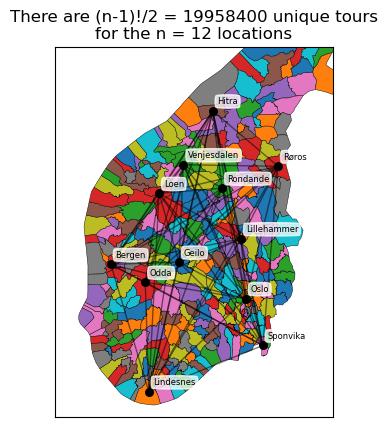

<Figure size 640x480 with 0 Axes>

In [4]:
view_all_possible_tours(municipalities, locations, positions,)

## As the crow flies
And by the way, you have a flying car because as you can see on the map, the lines are straight. Jokes aside, this is simply the visualisation of all possible routes, and one could input the actual road distances between each destination instead of "as the crow flies". Further, you could weight the edges between all nodes by the road gradient, i.e. how steep the road is. There are many ways to describe physical variables in the TSP.

## Ways to solve these problems – Heuristics
So there are $19 958 400$ unique ways to construct your road trip! It is therefore important not to be naïve about these kinds of problems and develop some algorithms that will find a good solution, or even the best solution, fast and more efficiently.
 
### Brute-force, *the naïve way*
As a refference method, consider a brute force approach, which would calculate the number of all possible routes and all distances. Place the route distances in a list and simply chose the route which has the shortest path. It might be easy when the problem size is 3-4, but after that there are better ways to search for the optimal solution.
### Nearest neighbor

This approach is a so-called local search and one of the easiest search heuristics for the TSP problem. The rules are to visit the nearest location and repeat until there are no more locations to visit, at which point you return to the initial location. This method is quick and has a good average performance. However, it does not guarantee that it will find the best solution. That is because when a nearest neigbour is selected, it wont consider any other combinations of tours. Once that neighbor is placed in the tour, it wont cange order.

### Branch and Bound
In contrast to the nearest neigbour algorithm which selects the first best options, branch and bound a generic algorithm to intelligently explore the space of all possible solutions to a combinatorial problem. Therefore, given enough time, it is guaranteed to find the optimal solution.


<img src="./figures/tsp_bnb.svg" width = 1000>

Figure 3: *The tree structure is made up of nodes and the connecting lines between, which are called edges. Each node has a name (node 1, 2, ...), the distance traveled so far, and the shortest route so far (the upper bound).*

#### Step 1
To begin with, the root node 1 (the home location Oslo in our TSP problem) is selected, see Step 1 in Figure 3. Since we havent made a tour yet, we define the upper bound to something very large, like 1 000 000 000, or infinity. We also need to define the total distance travelled, which is initially zero. Now we select the next unvisited node that yields the shortest travel distance and add that distance to the total distance travelled. At the new node, we branch again to a new location and repeat while the total distance travelled is less than the bound, until we reach an end node, called a leaf node.

#### Step 2
Once there are no more nodes to visit and we have found a better route whose distance is smaller than the very big upper bound we defined in the beginning, we set the upper bound to the routes travelling distance that you've just traversed. Thereafter you recursively backtrack (denoted by blue arrows in Step 2 of Figure 3) on a choice made previously with another configuration of nodes. If your total travelled distance now becomes larger than the newly set upper bound, you can stop looking down that “branch” of possible routes, because the best you can do there is still worse than what the bound has been set to by another route you've discovered, denoted by the red arrows.

There are more sophisticated ways to set the upper bound such that you can “prune” the branches of your search tree earlier and thus find the best route faster. These methods can reduce the number of possible routes (the search space) that need to be explored before finding an optimal route. However, these methods do not completely circumvent the fact that the solution space for combinatorial problems increases extremely fast with increased problem size. Hence, for a large enough (number of cities) enough TSP, so-called approximation methods should be favoured. DIRECT READER INTO SUCH METHODS AND MORE ABOUT BRANCH AND BOUDN AND PRUING ETC
 


# Coding Task: Nearest Neighbor
Ok, now that we have seen what the problem looks like on the map, and the staggering number of possible routes, i.e. the search space, we need to create an algorithm that can find a good roadtrip route!

You are given the task of implementing the nearest neighbor algorithm. The steps are as follows:
1. Set the starting location

2. Add starting location to the tour

3. Create a list of locations that are still unvisited

4. While there are still unvisited locations left:
    1. Find nearest neighbor
    2. Add nearest neigbor to the tour
    3. Remove the nearest neighbor from the unvisited set

In [5]:
def nearest_neighbor_task(locations_positions):
    """ Nearest neighbor algorithm finds a solution to the traveling salesperson problem.
    
    Args:
        locations (list): list of all locations

    Returns:
        list: the optimal tour given by the nearest neighbor algorithm
    """

    # 1. set "start" to position of Oslo
    start = locations_positions.get("Oslo")
    
    # 2. add start to the tour list. This list will contain the locations in the order which yields the shortest traveling distance (deemed by the nearest neighbor)
    tour = [start]
    
    # 3. This is the set of all unvisited locations. We include all locations and then remove Oslo.
    unvisited = set(set(locations_positions.values()) - {start})
    
    # 4. while the set of unvisited locations are not empty, we repeat the instructions inside the "while" loop
    while unvisited:
        # inside the while loop
        
        # get the nearest neighbor by calling the function:     nearest_neigbor(current location, list of unvisited locations)
        # your input "current location" is the location at the last place in the tour.
        # To get the last element in a list l, write l[-1]
        # the second input is the unvisited set.
        
        # 4.1 Find nearest neighbor: write code below
        C = nearest_neighbor(tour[-1], unvisited)
        
        # 4.2 to add the closest neigbor to the tour, use the method .append().
        # To add an element e to a list l, write l.append(e)
        tour.append(C)
        
        # 4.3 Remove the neigboring location from the unvisited set that you added to the tour.
        # # To remove an element e from the set l, write l.remove(e)
        unvisited.remove(C)
        
    return tour

In [6]:
#all_distances = calculate_all_distances(x_positions, y_positions)

nn_route_positions = nearest_neighbor_task(locations_positions)
print(nn_route_positions)

[(262250.90419973666, 6656330.65285516), (299028.36555759446, 6554921.84118816), (251867.31629106935, 6785780.591407208), (210762.27227871167, 6895320.486457972), (126965.92164506968, 6945950.831368996), (74321.14922620806, 6884060.735509393), (117425.25651214922, 6735260.620979348), (44444.909399205164, 6691824.2661994565), (-29955.627064228484, 6730323.520128507), (52138.924008021946, 6454529.061046956), (190430.5068513725, 7062559.961049936), (332001.08560875163, 6942737.384188138)]


tour for roadtrip:
Oslo -> Sponvika -> Lindesnes -> Odda -> Bergen -> Geilo -> Loen -> Venjesdalen -> Hitra -> Røros -> Rondande -> Lillehammer -> Oslo
Distance of the tour: 2202709 length units.



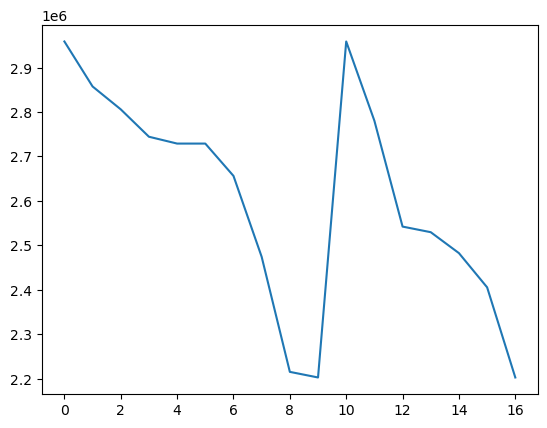

<Figure size 2000x2000 with 0 Axes>

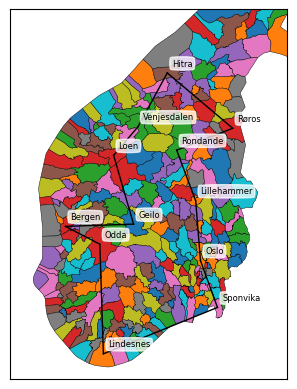

In [7]:
tour = ortools_solver(positions, locations)
view_ortools_sol(municipalities, positions, tour, locations)